In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [3]:
import pandas as pd
data = pd.read_csv('PdM_telemetry.csv')

In [4]:
data.describe()

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


In [5]:
data.columns

Index(['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration'], dtype='object')

In [6]:
data['datetime'].head(10)

0    2015-01-01 06:00:00
1    2015-01-01 07:00:00
2    2015-01-01 08:00:00
3    2015-01-01 09:00:00
4    2015-01-01 10:00:00
5    2015-01-01 11:00:00
6    2015-01-01 12:00:00
7    2015-01-01 13:00:00
8    2015-01-01 14:00:00
9    2015-01-01 15:00:00
Name: datetime, dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
datetime     876100 non-null object
machineID    876100 non-null int64
volt         876100 non-null float64
rotate       876100 non-null float64
pressure     876100 non-null float64
vibration    876100 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB


In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
data

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
876095,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
876096,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
876097,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
876098,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259


In [11]:
data.tail(50)

,datetime,machineID,volt,rotate,pressure,vibration
876050,2015-12-30 05:00:00,100,167.408644,537.866672,105.521430,44.095728
876051,2015-12-30 06:00:00,100,161.370389,430.543599,107.889110,37.583159
876052,2015-12-30 07:00:00,100,172.973926,561.867676,111.892689,41.627844
876053,2015-12-30 08:00:00,100,155.976100,448.994729,99.307290,42.310794
876054,2015-12-30 09:00:00,100,174.102230,372.584704,100.118701,33.823294
876055,2015-12-30 10:00:00,100,177.307187,570.088736,90.422007,45.801839
876056,2015-12-30 11:00:00,100,187.761555,448.455395,103.260935,37.997327
876057,2015-12-30 12:00:00,100,186.384638,473.266968,99.703391,36.319399
876058,2015-12-30 13:00:00,100,147.594046,513.038511,115.147773,40.343146
876059,2015-12-30 14:00:00,100,170.461262,394.396162,103.541698,48.870617


In [12]:
data.isna()

,datetime,machineID,volt,rotate,pressure,vibration
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
876095,False,False,False,False,False,False
876096,False,False,False,False,False,False
876097,False,False,False,False,False,False
876098,False,False,False,False,False,False


In [13]:
data.isna().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

In [14]:
data['datetime'].min()

'2015-01-01 06:00:00'

In [15]:
data['datetime'].max()

'2016-01-01 06:00:00'

This data is recorded over a year from 1/1/2015 - 1/1/2016.

In [16]:
data.head(10)

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
5,2015-01-01 11:00:00,1,172.504839,430.323362,95.927042,35.655017
6,2015-01-01 12:00:00,1,156.556031,499.071623,111.755684,42.753920
7,2015-01-01 13:00:00,1,172.522781,409.624717,101.001083,35.482009
8,2015-01-01 14:00:00,1,175.324524,398.648781,110.624361,45.482287
9,2015-01-01 15:00:00,1,169.218423,460.850670,104.848230,39.901735


In [17]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [18]:
data.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [19]:
plot_df = data.loc[ data['machineID']==1 & (data['datetime'] > pd.to_datetime('2015-01-01')) 
                   & (data['datetime'] < pd.to_datetime('2015-02-01')),
                  ['datetime','volt']]

In [20]:
plot_df.shape

(738, 2)

/home/nisarg/ml/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


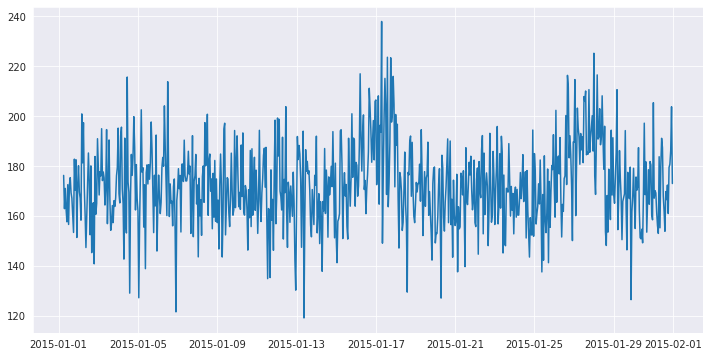

In [21]:
plot_df = data.loc[(data['machineID'] == 1) &
                        (data['datetime'] > pd.to_datetime('2015-01-01')) &
                        (data['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
plt.plot(plot_df['datetime'], plot_df['volt'])


In [22]:
data.columns

Index(['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration'], dtype='object')

In [23]:
errors = pd.read_csv('PdM_errors.csv')

In [24]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [25]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
datetime     3919 non-null object
machineID    3919 non-null int64
errorID      3919 non-null object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [26]:
errors.shape

(3919, 3)

In [27]:
b= errors.groupby('machineID')
pd.set_option('display.max_rows',len(b.count()))
b.count()

,datetime,errorID
machineID,,
1,35,35
2,28,28
3,39,39
4,31,31
5,38,38
6,23,23
7,39,39
8,42,42
9,40,40


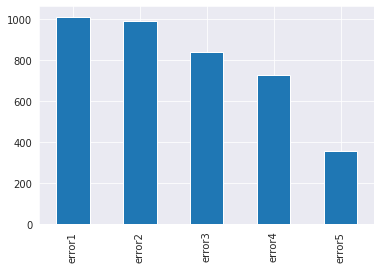

In [28]:
errors['errorID'].value_counts().plot(kind='bar')

In [29]:
maint = pd.read_csv('PdM_maint.csv')

In [30]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [31]:
maint['datetime'] = pd.to_datetime(maint['datetime'])

In [32]:
type(maint.iloc[0,0])

pandas._libs.tslibs.timestamps.Timestamp

In [33]:
type(maint.iloc[0,2])

str

In [34]:
maint['comp'] = maint['comp'].astype('category')

In [35]:
type(maint.iloc[0,2])

str

In [36]:
maint['comp'].dtype

CategoricalDtype(categories=['comp1', 'comp2', 'comp3', 'comp4'], ordered=False)

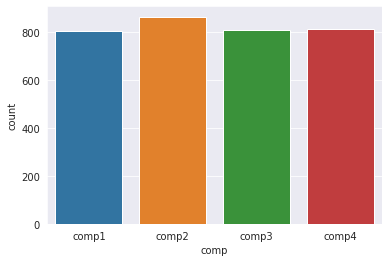

In [37]:
sns.countplot(x=maint['comp'])

In [38]:
machines= pd.read_csv('PdM_machines.csv')

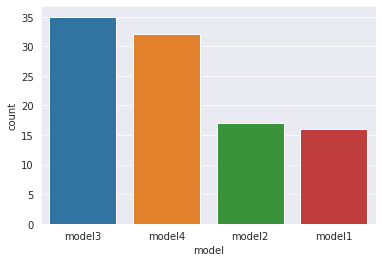

In [39]:
sns.countplot(x='model',data=machines)

In [40]:
data.head(8762)

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
8757,2016-01-01 03:00:00,1,172.418099,375.701907,95.568265,42.111661
8758,2016-01-01 04:00:00,1,174.588145,460.505353,95.483913,33.293572
8759,2016-01-01 05:00:00,1,184.224228,438.823315,102.694358,46.609515
8760,2016-01-01 06:00:00,1,191.873171,382.736626,100.893691,37.940220


In [41]:
errors['machineID'].value_counts()

22     60
99     54
78     54
15     51
49     51
81     51
88     50
63     50
79     50
17     49
20     47
18     46
54     46
52     46
53     45
92     45
71     45
97     45
98     45
10     45
83     44
80     44
94     44
37     43
60     43
50     43
84     43
29     43
66     43
69     43
26     42
40     42
38     42
72     42
13     42
91     42
8      42
90     41
12     41
16     41
30     40
9      40
51     40
85     40
28     40
35     40
21     40
11     39
7      39
87     39
3      39
96     39
73     39
47     39
67     39
56     38
75     38
42     38
68     38
14     38
5      38
43     38
39     37
32     37
95     37
70     37
25     37
55     37
64     37
45     37
23     37
33     37
74     36
59     35
1      35
58     35
65     35
61     34
34     34
24     33
57     33
82     33
44     32
36     32
76     32
4      31
100    31
27     31
41     31
89     31
93     31
48     30
46     29
62     28
19     28
2      28
86     27
31     26
6      23
77     22


In [42]:
errors.columns

Index(['datetime', 'machineID', 'errorID'], dtype='object')

In [43]:
errors.columns

Index(['datetime', 'machineID', 'errorID'], dtype='object')

In [44]:
errors['errorID'].value_counts()

error1    1010
error2     988
error3     838
error4     727
error5     356
Name: errorID, dtype: int64

In [45]:
errors.shape

(3919, 3)

In [46]:
maint = pd.read_csv('PdM_maint.csv')

In [47]:
maint['datetime'].min()

'2014-06-01 06:00:00'

In [48]:
maint['datetime'].max()

'2016-01-01 06:00:00'

In [49]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [50]:
maint['machineID'].value_counts()

70     39
66     39
68     39
24     38
10     38
14     38
84     38
27     38
42     38
30     37
62     37
3      37
52     37
1      37
98     37
7      37
95     37
81     37
46     36
37     35
63     35
5      35
54     35
35     35
69     34
19     34
6      34
83     34
29     34
97     34
79     34
90     34
41     34
43     34
88     34
40     34
36     34
32     34
9      34
57     34
59     34
26     34
99     34
96     33
82     33
39     33
64     33
13     33
48     33
44     33
78     33
65     33
71     33
22     33
75     33
77     33
20     33
4      33
76     33
60     32
34     32
2      32
23     32
93     32
92     32
17     32
31     32
28     31
51     31
67     31
73     31
45     31
33     31
50     31
80     31
58     31
12     31
94     31
56     30
85     30
86     30
61     30
55     30
87     29
16     29
8      29
38     29
25     29
21     29
11     29
72     29
49     28
18     28
15     28
100    28
47     27
89     27
91     27
74     26
53     25


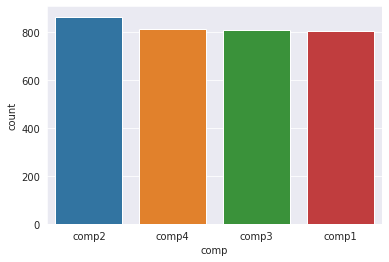

In [51]:
sns.countplot(x=maint['comp'])

In [52]:
failures = pd.read_csv('PdM_failures.csv')

In [53]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


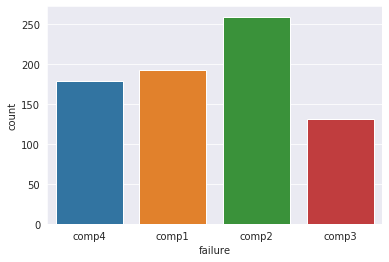

In [54]:
sns.countplot(x=failures['failure'])

In [55]:
machine = pd.read_csv('PdM_machines.csv')

In [56]:
machine.columns

Index(['machineID', 'model', 'age'], dtype='object')

In [57]:
machine.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


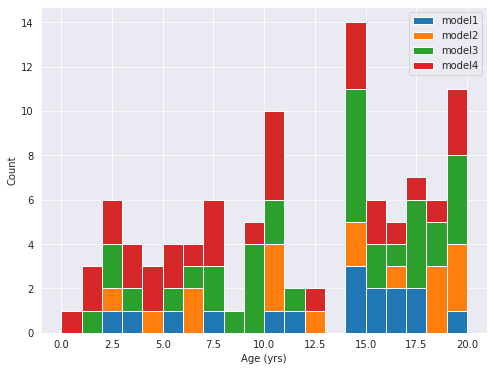

In [58]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([machines.loc[machines['model'] == 'model1', 'age'],
                       machines.loc[machines['model'] == 'model2', 'age'],
                       machines.loc[machines['model'] == 'model3', 'age'],
                       machines.loc[machines['model'] == 'model4', 'age']],
                       20, stacked=True, label=['model1', 'model2', 'model3', 'model4'])
plt.xlabel('Age (yrs)')
plt.ylabel('Count')
plt.legend()

In [59]:
data.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [60]:
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(data,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right', how='mean').unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)

# repeat for standard deviation
temp = []
for col in fields:
    temp.append(pd.pivot_table(data,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right', how='std').unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()

/home/nisarg/ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  import sys
/home/nisarg/ml/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).std()


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [61]:
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']

# combine errors for a given machine in a given hour
error_count = error_count.groupby(['machineID', 'datetime']).sum().reset_index()
error_count.head(13)

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0
5,1,2015-01-25 15:00:00,0,0,0,1,0
6,1,2015-01-27 04:00:00,1,0,0,0,0
7,1,2015-03-03 22:00:00,0,1,0,0,0
8,1,2015-03-05 06:00:00,1,0,0,0,0
9,1,2015-03-20 18:00:00,1,0,0,0,0


In [62]:


temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append((pd.pivot_table(data,
                                               index='datetime',
                                               columns='machineID',
                                               values=col)).resample('3H',
                                                                                closed='left',
                                                                                label='right',
                                                                                how='first').rolling(window=24).mean().unstack())
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

# repeat for standard deviation
temp = []
fields = ['volt', 'rotate', 'pressure', 'vibration']
for col in fields:
    temp.append((pd.pivot_table(data,
                                               index='datetime',
                                               columns='machineID',
                                               values=col)).resample('3H',
                                                                                closed='left',
                                                                                label='right',
                                                                                how='first').rolling(window=24).mean().unstack())
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

# Notice that a 24h rolling average is not available at the earliest timepoints
telemetry_mean_24h.head(10)



/home/nisarg/ml/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  # Remove the CWD from sys.path while we load stuff.
/home/nisarg/ml/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()


,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
23,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022
24,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324
25,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216
26,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232
27,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570
28,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929
29,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369
30,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982
31,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346
32,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655


In [63]:
telemetry_mean_24h.columns

Index(['machineID', 'datetime', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h'],
      dtype='object')

In [64]:
telemetry_mean_24h.shape

(289800, 6)

In [65]:
data.shape

(876100, 6)

In [66]:
telemetry_mean_24h.head()

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
23,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022
24,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324
25,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216
26,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232
27,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570


In [67]:
machines

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2
5,6,model3,7
6,7,model3,20
7,8,model3,16
8,9,model4,7
9,10,model3,10


In [68]:
final = telemetry_mean_24h.merge(machines,how='inner',left_on=['machineID'], right_on=['machineID'])

In [69]:
final.head()

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,model,age
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,model3,18
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,model3,18
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,model3,18
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,model3,18
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,model3,18


In [70]:
final.describe()

,machineID,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,age
count,289800.00000,289800.000000,289800.000000,289800.000000,289800.000000,289800.000000
mean,50.50000,170.727227,446.640547,100.866006,40.380446,11.330000
std,28.86612,4.166841,15.659845,3.968049,1.761692,5.827625
min,1.00000,156.713608,310.118604,91.162625,35.800869,0.000000
25%,25.75000,168.097257,440.861651,98.730726,39.377596,6.750000
50%,50.50000,170.279341,448.776742,100.195579,40.105955,12.000000
75%,75.25000,172.599180,456.140796,101.777636,40.907991,16.000000
max,100.00000,206.333895,491.081522,138.291979,55.266429,20.000000


In [71]:
data.shape[0]/final.shape[0]

3.02311939268461

In [72]:
data.shape

(876100, 6)

In [73]:
final.head(100)

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,model,age
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,model3,18
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,model3,18
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,model3,18
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,model3,18
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,model3,18
5,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929,model3,18
6,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369,model3,18
7,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982,model3,18
8,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346,model3,18
9,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655,model3,18


In [74]:
final.columns

Index(['machineID', 'datetime', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'model', 'age'],
      dtype='object')

In [75]:
final['failure']=0

In [76]:
final.columns

Index(['machineID', 'datetime', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'model', 'age', 'failure'],
      dtype='object')

In [77]:
final.head()

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,model,age,failure
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,model3,18,0
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,model3,18,0
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,model3,18,0
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,model3,18,0
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,model3,18,0


In [78]:
final.drop('failure',axis=1)

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,model,age
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,model3,18
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,model3,18
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,model3,18
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,model3,18
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,model3,18
...,...,...,...,...,...,...,...,...
289795,100,2015-12-31 21:00:00,167.150652,435.983604,98.622717,37.811625,model4,5
289796,100,2016-01-01 00:00:00,167.039345,441.478463,98.863161,37.660150,model4,5
289797,100,2016-01-01 03:00:00,167.541122,437.475072,99.025311,38.053762,model4,5
289798,100,2016-01-01 06:00:00,169.654054,435.045988,98.823486,37.934366,model4,5


In [79]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [80]:
final.head(50)

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,model,age,failure
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,model3,18,0
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,model3,18,0
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,model3,18,0
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,model3,18,0
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,model3,18,0
5,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929,model3,18,0
6,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369,model3,18,0
7,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982,model3,18,0
8,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346,model3,18,0
9,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655,model3,18,0


In [81]:
failures['failure'] =1

In [82]:
failures.head(100)

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,1
1,2015-03-06 06:00:00,1,1
2,2015-04-20 06:00:00,1,1
3,2015-06-19 06:00:00,1,1
4,2015-09-02 06:00:00,1,1
5,2015-10-17 06:00:00,1,1
6,2015-12-16 06:00:00,1,1
7,2015-03-19 06:00:00,2,1
8,2015-03-19 06:00:00,2,1
9,2015-04-18 06:00:00,2,1


In [83]:
final['datetime'].dtype

dtype('<M8[ns]')

In [84]:
final['datetime'] = pd.to_datetime( final['datetime'] )

In [85]:
final['datetime']

0        2015-01-04 06:00:00
1        2015-01-04 09:00:00
2        2015-01-04 12:00:00
3        2015-01-04 15:00:00
4        2015-01-04 18:00:00
                 ...        
289795   2015-12-31 21:00:00
289796   2016-01-01 00:00:00
289797   2016-01-01 03:00:00
289798   2016-01-01 06:00:00
289799   2016-01-01 09:00:00
Name: datetime, Length: 289800, dtype: datetime64[ns]

In [86]:
failures['datetime'].dtype

dtype('O')

In [87]:
failures['datetime'] = pd.to_datetime( failures['datetime'] )

In [88]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289800 entries, 0 to 289799
Data columns (total 9 columns):
machineID            289800 non-null int64
datetime             289800 non-null datetime64[ns]
voltmean_24h         289800 non-null float64
rotatemean_24h       289800 non-null float64
pressuremean_24h     289800 non-null float64
vibrationmean_24h    289800 non-null float64
model                289800 non-null object
age                  289800 non-null int64
failure              289800 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 22.1+ MB


In [89]:
failures['date'] = failures['datetime'].dt.date

In [90]:
failures.head(10)

,datetime,machineID,failure,date
0,2015-01-05 06:00:00,1,1,2015-01-05
1,2015-03-06 06:00:00,1,1,2015-03-06
2,2015-04-20 06:00:00,1,1,2015-04-20
3,2015-06-19 06:00:00,1,1,2015-06-19
4,2015-09-02 06:00:00,1,1,2015-09-02
5,2015-10-17 06:00:00,1,1,2015-10-17
6,2015-12-16 06:00:00,1,1,2015-12-16
7,2015-03-19 06:00:00,2,1,2015-03-19
8,2015-03-19 06:00:00,2,1,2015-03-19
9,2015-04-18 06:00:00,2,1,2015-04-18


In [91]:
final['date'] = final['datetime'].dt.date

In [92]:
final.head(10)

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,model,age,failure,date
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,model3,18,0,2015-01-04
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,model3,18,0,2015-01-04
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,model3,18,0,2015-01-04
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,model3,18,0,2015-01-04
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,model3,18,0,2015-01-04
5,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929,model3,18,0,2015-01-04
6,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369,model3,18,0,2015-01-05
7,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982,model3,18,0,2015-01-05
8,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346,model3,18,0,2015-01-05
9,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655,model3,18,0,2015-01-05


In [93]:
final2 = final.merge(failures, how='left',left_on=['machineID','date'],right_on=['machineID','date'])

In [94]:
final2.head(10)

,machineID,datetime_x,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,model,age,failure_x,date,datetime_y,failure_y
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,model3,18,0,2015-01-04,NaT,NaN
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,model3,18,0,2015-01-04,NaT,NaN
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,model3,18,0,2015-01-04,NaT,NaN
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,model3,18,0,2015-01-04,NaT,NaN
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,model3,18,0,2015-01-04,NaT,NaN
5,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929,model3,18,0,2015-01-04,NaT,NaN
6,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369,model3,18,0,2015-01-05,2015-01-05 06:00:00,1.0
7,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982,model3,18,0,2015-01-05,2015-01-05 06:00:00,1.0
8,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346,model3,18,0,2015-01-05,2015-01-05 06:00:00,1.0
9,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655,model3,18,0,2015-01-05,2015-01-05 06:00:00,1.0


In [95]:
final2.drop('datetime_y',axis=1,inplace=True)

In [96]:
final2.head(10)

,machineID,datetime_x,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,model,age,failure_x,date,failure_y
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,model3,18,0,2015-01-04,NaN
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,model3,18,0,2015-01-04,NaN
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,model3,18,0,2015-01-04,NaN
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,model3,18,0,2015-01-04,NaN
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,model3,18,0,2015-01-04,NaN
5,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929,model3,18,0,2015-01-04,NaN
6,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369,model3,18,0,2015-01-05,1.0
7,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982,model3,18,0,2015-01-05,1.0
8,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346,model3,18,0,2015-01-05,1.0
9,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655,model3,18,0,2015-01-05,1.0


In [261]:
final2.head(10)

,machineID,datetime_x,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,model,age,failure
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,model3,18,0.0
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,model3,18,0.0
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,model3,18,0.0
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,model3,18,0.0
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,model3,18,0.0
5,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929,model3,18,0.0
6,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369,model3,18,1.0
7,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982,model3,18,1.0
8,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346,model3,18,1.0
9,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655,model3,18,1.0


In [ ]:
final2.to_csv('final_dataset.csv', index=False)

Importing Final_dataset just to check if it is correctly saved

In [222]:
final2 = pd.read_csv('final_dataset.csv')
final2.head(10)

,machineID,datetime_x,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,model,age,failure
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,model3,18,0.0
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,model3,18,0.0
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,model3,18,0.0
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,model3,18,0.0
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,model3,18,0.0
5,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929,model3,18,0.0
6,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369,model3,18,1.0
7,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982,model3,18,1.0
8,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346,model3,18,1.0
9,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655,model3,18,1.0


In [223]:
final2['model'] = final2['model'].astype('category')

In [224]:
final2.head(10)

,machineID,datetime_x,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,model,age,failure
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,model3,18,0.0
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,model3,18,0.0
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,model3,18,0.0
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,model3,18,0.0
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,model3,18,0.0
5,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929,model3,18,0.0
6,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369,model3,18,1.0
7,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982,model3,18,1.0
8,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346,model3,18,1.0
9,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655,model3,18,1.0


In [225]:
final2['model'].dtype

CategoricalDtype(categories=['model1', 'model2', 'model3', 'model4'], ordered=False)

In [209]:
#from sklearn.preprocessing import OneHotEncoder
#cat_enc = OneHotEncoder()
#final2_1hot = cat_enc.fit_transform(final2[['model']]) 

In [210]:
#final2_1hot

<290128x4 sparse matrix of type '<class 'numpy.float64'>'
	with 290128 stored elements in Compressed Sparse Row format>

In [211]:
#final2_1hot = pd.DataFrame(final2_1hot)

In [212]:
#cat_enc.categories_

[array(['model1', 'model2', 'model3', 'model4'], dtype=object)]

In [213]:
#final3 = pd.concat([final2 , final2_1hot], axis=1).drop(['model'],axis=1)

In [221]:
#final3[0]

0           (0, 2)\t1.0
1           (0, 2)\t1.0
2           (0, 2)\t1.0
3           (0, 2)\t1.0
4           (0, 2)\t1.0
              ...      
290123      (0, 3)\t1.0
290124      (0, 3)\t1.0
290125      (0, 3)\t1.0
290126      (0, 3)\t1.0
290127      (0, 3)\t1.0
Name: 0, Length: 290128, dtype: object

In [234]:
final2.head(20)

,machineID,datetime_x,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,model,age,failure
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,model3,18,0.0
1,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324,model3,18,0.0
2,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216,model3,18,0.0
3,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232,model3,18,0.0
4,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570,model3,18,0.0
5,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929,model3,18,0.0
6,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369,model3,18,1.0
7,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982,model3,18,1.0
8,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346,model3,18,1.0
9,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655,model3,18,1.0


In [227]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_enc = OrdinalEncoder()
final2_model = ordinal_enc.fit_transform( final2[['model']] )

In [242]:
transformed = pd.DataFrame(final2_model)

In [245]:
transformed.tail(10)

,0
290118,3.0
290119,3.0
290120,3.0
290121,3.0
290122,3.0
290123,3.0
290124,3.0
290125,3.0
290126,3.0
290127,3.0


In [246]:
#data = pd.concat([data, ohe_df], axis=1).drop(['Profession'], axis=1)
final3 = pd.concat([final2, transformed], axis=1).drop(['model'],axis=1)

In [250]:
final3.rename( columns={0:'model_enc'} , inplace=True) 

In [263]:
final3.head(10)

,machineID,datetime_x,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,age,failure,model_enc
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,18,0.0,2.0
81280,29,2015-01-04 06:00:00,166.613863,453.121906,101.166076,40.561007,3,0.0,3.0
84178,30,2015-01-04 06:00:00,175.672229,446.957238,98.466369,39.988195,20,0.0,2.0
87084,31,2015-01-04 06:00:00,168.979748,455.771697,97.419663,41.387643,11,0.0,0.0
89990,32,2015-01-04 06:00:00,171.493287,407.726484,106.015786,38.649454,15,0.0,3.0
92896,33,2015-01-04 06:00:00,175.168741,454.184145,100.671976,41.085385,14,0.0,2.0
95802,34,2015-01-04 06:00:00,173.328973,455.117356,99.151464,40.033005,10,0.0,3.0
98700,35,2015-01-04 06:00:00,178.763065,449.160120,100.003531,39.886126,17,0.0,0.0
101606,36,2015-01-04 06:00:00,176.242128,447.897105,118.892609,40.369239,5,0.0,3.0
104504,37,2015-01-04 06:00:00,168.502826,397.730541,100.414238,46.683949,16,1.0,0.0


In [252]:
final3['model_enc'].value_counts()

2.0    101502
3.0     92824
1.0     49330
0.0     46472
Name: model_enc, dtype: int64

In [264]:
ordinal_enc.categories_

[array(['model1', 'model2', 'model3', 'model4'], dtype=object)]

In [257]:
final3.sort_values(by=['datetime_x'], inplace=True)

In [258]:
final3.to_csv('final_dataset2.csv',index=False)

In [259]:
final31 = pd.read_csv('final_dataset2.csv')

In [260]:
final31.head()

,machineID,datetime_x,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,age,failure,model_enc
0,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022,18,0.0,2.0
1,29,2015-01-04 06:00:00,166.613863,453.121906,101.166076,40.561007,3,0.0,3.0
2,30,2015-01-04 06:00:00,175.672229,446.957238,98.466369,39.988195,20,0.0,2.0
3,31,2015-01-04 06:00:00,168.979748,455.771697,97.419663,41.387643,11,0.0,0.0
4,32,2015-01-04 06:00:00,171.493287,407.726484,106.015786,38.649454,15,0.0,3.0
